In [66]:
!pip install yahoofinancials

import pandas as pd
from yahoofinancials import YahooFinancials
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [51]:
all_tickers = ["AAPL", "MSFT", "CSCO", "AMZN", "INTC"]

In [52]:
# Extracting stock data (historical close price) for the stocks identified
close_prices = pd.DataFrame()
end_date = (dt.date.today()).strftime('%Y-%m-%d')  # string format time
beg_date = (dt.date.today()-dt.timedelta(1825)).strftime('%Y-%m-%d')

In [53]:
for ticker in all_tickers:
    yahoo_financials = YahooFinancials(ticker)
    json_obj = yahoo_financials.get_historical_price_data(beg_date, end_date, "daily")
    ohlv     = json_obj[ticker]["prices"]     # ohlv is a list
    temp     = pd.DataFrame(ohlv)[["formatted_date","adjclose"]] # list to dataframe
    temp.set_index("formatted_date", inplace=True)
    temp.dropna(inplace=True) # Drop Nan Values
    close_prices[ticker] = temp["adjclose"]

In [55]:
close_prices

,AAPL,MSFT,CSCO,AMZN,INTC
formatted_date,,,,,
2018-01-02,40.950489,80.940392,33.400398,59.450500,40.787403
2018-01-03,40.943367,81.317078,33.666855,60.209999,39.403149
2018-01-04,41.133541,82.032776,33.762104,60.479500,38.680553
2018-01-05,41.601864,83.049828,34.229691,61.457001,38.950451
2018-01-08,41.447342,83.134598,34.584717,62.343498,38.950451
...,...,...,...,...,...
2022-12-21,135.449997,244.429993,47.660000,86.769997,26.830000
2022-12-22,132.229996,238.190002,47.320000,83.790001,25.969999
2022-12-23,131.860001,238.729996,47.480000,85.250000,26.090000


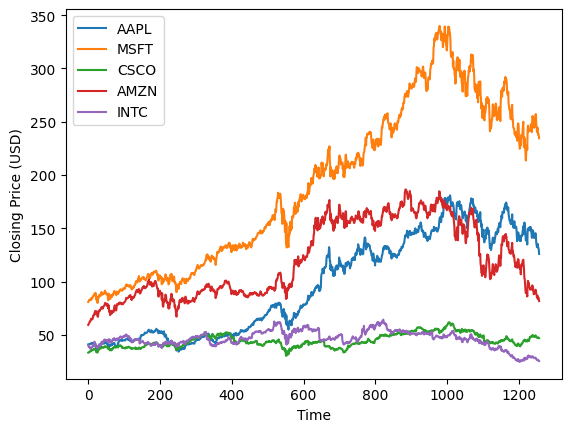

In [79]:
#Plotting timeseries of closing prices of AAPL

for ticker in all_tickers:
    plt.plot(np.arange(0,len(close_prices[ticker]), 1), close_prices[ticker])

plt.xlabel("Time")
plt.ylabel("Closing Price (USD)")
plt.legend(all_tickers)
plt.show()